# MAIN CODE

In [1]:
import sys
sys.path.append('C:\\Users\\joo09\\Documents\\GitHub')
import ownlibrary as lib

from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import cv2
import os
import math


loadimage = "opposite"

src = cv2.imread("{}.jpg".format(loadimage), cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)


df_h = pd.DataFrame(h)
df_s = pd.DataFrame(s)
df_v = pd.DataFrame(v)


list_h = []
list_s = []
list_v = []


for i in range(df_h.shape[0]) :
    for j in range(df_h.shape[1]) :
        list_h.append(df_h.iloc[i, j])
print('h of hsv done')
        
for i in range(df_s.shape[0]) :
    for j in range(df_s.shape[1]) :
        list_s.append(df_s.iloc[i, j])
print('s of hsv done')
        
for i in range(df_v.shape[0]) :
    for j in range(df_v.shape[1]) :
        list_v.append(df_v.iloc[i, j])
print('v of hsv done')


cart_df = pd.DataFrame(columns = ['cart_h', 'cart_s', 'cart_v'])
cart_df['cart_h'] = list_h
cart_df['cart_s'] = list_s
cart_df['cart_v'] = list_v

print(cart_df)

# print(list_h[ : 10])
# print(list_s[ : 10])
# print(list_v[ : 10])

h of hsv done
s of hsv done
v of hsv done
        cart_h  cart_s  cart_v
0          116     -79     121
1          116     -79     121
2          116     -81     118
3          116     -78     116
4          116     -79     117
...        ...     ...     ...
247820     114     -75    -118
247821     114     -75    -118
247822     114     -75    -118
247823     114     -75    -118
247824     114     -75    -118

[247825 rows x 3 columns]


## PLOT

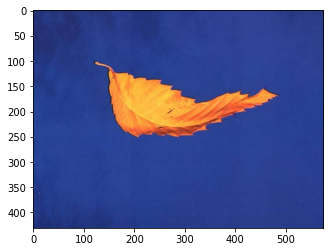

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_plot = mpimg.imread('{}.jpg'.format(loadimage))
imgplot = plt.imshow(img_plot)

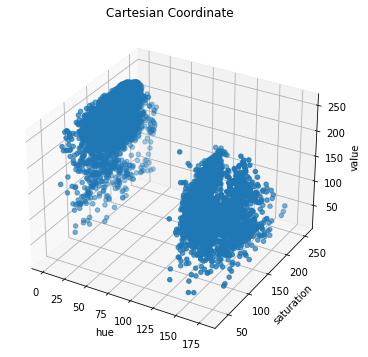

In [3]:
plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(list_h, list_s, list_v, cmap="plasma")
plt.xlabel('hue')
plt.ylabel('saturation')
ax.set_zlabel('value', rotation=90)
plt.title('Cartesian Coordinate')
plt.savefig('cartesian_{}.png'.format(loadimage), dpi=400)
plt.show()

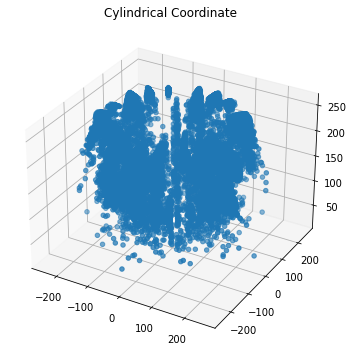

In [4]:
cyl_x = []
cyl_y = []
cyl_z = []

hsv_size = hsv.shape[0] * hsv.shape[1]

for i in range(hsv_size) :
    p_i = list_s[i]
    pi_i = list_h[i]
    z_i = list_v[i]
    
    c_x, c_y, c_z = lib.cylinder(p_i, pi_i, z_i)
    
    cyl_x.append(c_x)
    cyl_y.append(c_y)
    cyl_z.append(c_z)
    
# print(cart_x[ : 10])
# print(cart_y[ : 10])
# print(cart_z[ : 10])


plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
cylx = fig.add_subplot(111, projection = '3d')
cylx.scatter(cyl_x, cyl_y, cyl_z, cmap="plasma")
plt.title('Cylindrical Coordinate')
plt.savefig('cylindrical_{}.png'.format(loadimage), dpi=400)
plt.show()

## CLUSTERING ( K - MEANS with Elbow method )

### cartesian clustering

k: 1  SSE: 1164678528.7086656
k: 2  SSE: 350983670.79383093
k: 3  SSE: 121103878.93958779
k: 4  SSE: 73858735.4849677
k: 5  SSE: 63443719.97058675
k: 6  SSE: 52838714.97039648
k: 7  SSE: 43568954.390921034
k: 8  SSE: 36054308.245346285
k: 9  SSE: 27835735.823839277
k: 10  SSE: 24198755.72206962


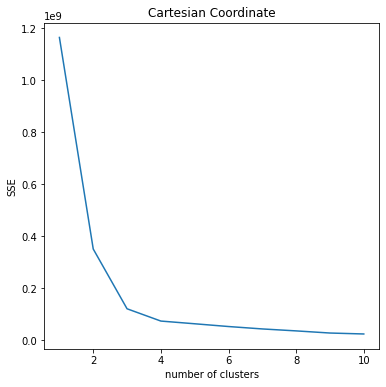

In [6]:
from sklearn.cluster import KMeans
import csv
import pandas as pd

K = 10

SSE_list_cart = []
for k in range(1, K + 1):
    # Create a kmeans model on our data, using k clusters.
    #   Random_state helps ensure that the algorithm returns the
    #   same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(cart_df.iloc[:, :])

    # These are our fitted labels for clusters --
    #   the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    SSE = kmeans_model.inertia_
    SSE_list_cart.append(SSE)
    print("k:",k, " SSE:", SSE)
    
cart_df['Labels'] = labels

xvalue = []
for i in range(1, K + 1) :
    xvalue.append(i)
    
plt.plot(xvalue, SSE_list_cart)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Cartesian Coordinate')
plt.savefig('{}_cart_SSE.png'.format(loadimage), dpi=400)
plt.show()


cart_df.to_excel('cart_{}.xlsx'.format(loadimage))

### cylindrical clustering

In [7]:
from sklearn.cluster import KMeans
import csv
import pandas as pd

cyl_df = pd.DataFrame(columns = ['cyl_x', 'cyl_y', 'cyl_z'])
cyl_df['cyl_x'] = cyl_x
cyl_df['cyl_y'] = cyl_y
cyl_df['cyl_z'] = cyl_z

print(cyl_df)

             cyl_x       cyl_y  cyl_z
0      -171.971818   41.889067    121
1      -171.971818   41.889067    121
2      -170.028633   41.415744    118
3      -172.943410   42.125728    116
4      -171.971818   41.889067    117
...            ...         ...    ...
247820  112.133231  142.081450   -118
247821  112.133231  142.081450   -118
247822  112.133231  142.081450   -118
247823  112.133231  142.081450   -118
247824  112.133231  142.081450   -118

[247825 rows x 3 columns]


K-clusters:  10
k: 1  SSE: 5391406835.969845
k: 2  SSE: 2751339510.656868
k: 3  SSE: 1613751548.8396552
k: 4  SSE: 1129836197.0142221
k: 5  SSE: 778555012.0640677
k: 6  SSE: 498498555.5889529
k: 7  SSE: 405672970.88314825
k: 8  SSE: 345369906.08215564
k: 9  SSE: 298265360.52718353
k: 10  SSE: 237524351.6634656


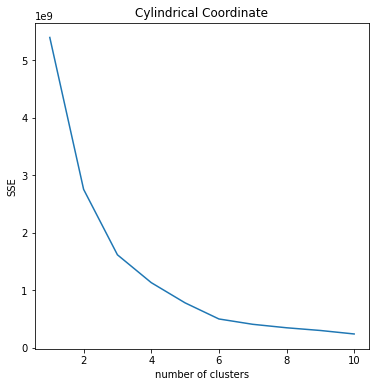

In [8]:
from sklearn.cluster import KMeans
import csv
import pandas as pd

K = 10

print("K-clusters: ", K)

SSE_list_cyl = []
for k in range(1, K + 1):
    # Create a kmeans model on our data, using k clusters.
    #   Random_state helps ensure that the algorithm returns the
    #   same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(cyl_df.iloc[:, :])

    # These are our fitted labels for clusters --
    #   the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    SSE = kmeans_model.inertia_
    SSE_list_cyl.append(SSE)
    print("k:",k, " SSE:", SSE)

# Add labels to df
cyl_df['Labels'] = labels
#print(df)

xvalue = []
for i in range(1, K + 1) :
    xvalue.append(i)
    
plt.plot(xvalue, SSE_list_cyl)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Cylindrical Coordinate')
plt.savefig('{}_cyl_SSE.png'.format(loadimage), dpi=400)
plt.show()


cart_df.to_excel('cyl_{}.xlsx'.format(loadimage))

## K - means, elbow = 6

In [9]:
k_cart = 3
k_cyl = 6
kmeans_model_cart = KMeans(n_clusters=k_cart, random_state=1).fit(cart_df.iloc[:, :])
kmeans_model_cyl = KMeans(n_clusters=k_cyl, random_state=1).fit(cyl_df.iloc[:, :])

center_cart = kmeans_model_cart.cluster_centers_
center_cyl = kmeans_model_cyl.cluster_centers_

print(center_cart)
print(center_cyl)

[[ 113.56137525  -73.66526068 -110.76150845    5.15291384]
 [ 114.44752539  -72.25665001  120.75793971    3.05094309]
 [   7.17300148  -55.7187935   -10.08070027    1.74469521]]
[[ 4.61018132e+01  1.53664529e+02  8.64974063e+01  4.49526554e+00]
 [ 1.84620901e+02 -1.83038600e+01 -1.03772331e+02  1.25946962e+00]
 [ 1.12791607e+02  1.40135830e+02 -1.10339403e+02  1.57124027e-01]
 [ 5.35522738e+01 -1.64573506e+02 -6.90355509e+01  6.16417910e+00]
 [-5.78580092e+01  1.65588885e+02 -1.04766996e+02  2.00313571e+00]
 [-1.60853674e+02  2.01256566e+01  2.97296744e+01  6.68717099e+00]]


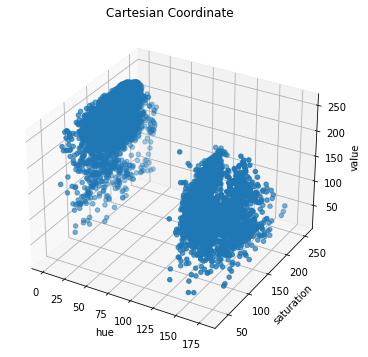

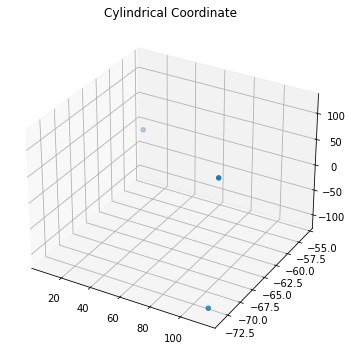

In [15]:
## Cartesian with center

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(list_h, list_s, list_v, cmap="plasma")
plt.xlabel('hue')
plt.ylabel('saturation')
ax.set_zlabel('value', rotation=90)
plt.title('Cartesian Coordinate')
plt.savefig('cartesian_{}.png'.format(loadimage), dpi=400)
plt.show()

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
cart_center = fig.add_subplot(111, projection = '3d')
cart_center.scatter(center_cart[:, 0], center_cart[:, 1], center_cart[:, 2], cmap="plasma")
plt.title('Cylindrical Coordinate')
# plt.savefig('cylindrical_{}.png'.format(loadimage), dpi=400)
plt.show()

print(cart_center)

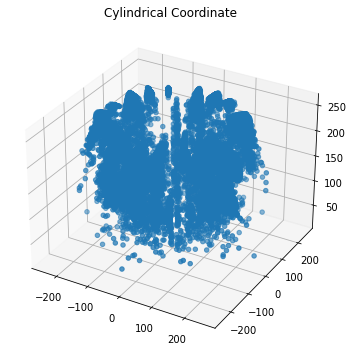

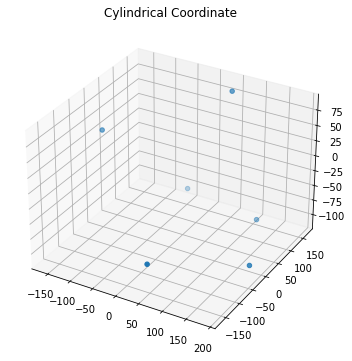

In [16]:
## Cylindrical with center

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
cylx = fig.add_subplot(111, projection = '3d')
cylx.scatter(cyl_x, cyl_y, cyl_z, cmap="plasma")
plt.title('Cylindrical Coordinate')
plt.savefig('cylindrical_{}.png'.format(loadimage), dpi=400)
plt.show()

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
cyl_center = fig.add_subplot(111, projection = '3d')
cyl_center.scatter(center_cyl[:, 0], center_cyl[:, 1], center_cyl[:, 2], cmap="plasma")
plt.title('Cylindrical Coordinate')
# plt.savefig('cylindrical_{}.png'.format(loadimage), dpi=400)
plt.show()

print(cyl_center)

In [21]:
## Cylindrical with K = 100


k_cyl_1000 = 1000
kmeans_model_cyl_1000 = KMeans(n_clusters=k_cyl_1000, random_state=1).fit(cyl_df.iloc[:, :])

center_cyl_1000 = kmeans_model_cyl_1000.cluster_centers_


# print(center_cyl_100)

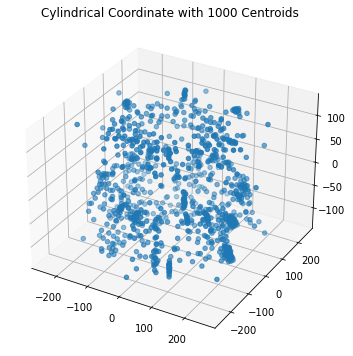

In [22]:
## PLOT 1000 CENTROIDS

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
cyl_center_1000 = fig.add_subplot(111, projection = '3d')
cyl_center_1000.scatter(center_cyl_1000[:, 0], center_cyl_1000[:, 1], center_cyl_1000[:, 2], cmap="plasma")
plt.title('Cylindrical Coordinate with 1000 Centroids')
plt.savefig('cylindrical_{}_1000_centroids.png'.format(loadimage), dpi=400)
plt.show()

# MAIN CODE (2)

In [ ]:
np_hsv = np.zeros([hsv.shape[0] * hsv.shape[1], 3])

print(hsv.shape)
for i in range(hsv.shape[0]) :
    for j in range(hsv.shape[1]) :
        np_hsv[hsv.shape[1] * i + j, :] = hsv[i, j]

for i in range(np_hsv.shape[0]) :
    

In [ ]:
import sys
sys.path.append('C:\\Users\\joo09\\Documents\\GitHub')
import ownlibrary as lib
                
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import os


In [ ]:
loadimage = "opposite"

df_all = pd.read_excel('hsv_{}.xlsx'.format(loadimage))
df_all = lib.delun(df_all)


In [ ]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a = np.array()
print(a.shape)

In [ ]:
print(df_all.shape)

hsv_count = {}
hsv_list = []

for i in range(df_all.shape[0]) :
    for j in range(df_all.shape[1]) :
        hsv_list.append(df_all.iloc[i, j])
        
if len(hsv_list) == df_all.shape[0] * df_all.shape[1] :
    print('list well made !!')

for name in hsv_list :
    try : hsv_count[name] += 1
    except : hsv_count[name] = 1

        



print(hsv_count)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def destringifyTupleData(d):
    return [tuple(destringifyList(l)) for l in trainX]

def destringifyList(l):
    return map(float, l)


In [ ]:
hsv_major = []

for key in hsv_count.keys() :
    if hsv_count[key] > 1 :
        hsv_major.append(key)

print('major values are ', len(hsv_major) / len(hsv_list) * 100, '%')
# print(len(hsv_list))

# for i in range(len(hsv_count)) :
#     if 
num_major = len(hsv_major)

x_major = []
y_major = []
z_major = []

for i in range(num_major) :
    x_major.append(hsv_major[i][1 : 4])
    y_major.append(hsv_major[i][6 : 9])
    z_major.append(hsv_major[i][11 : 14])

print(len(x_major), x_major[ : 10])
print(len(y_major), y_major[ : 10])
print(len(z_major), z_major[ : 10])
print(x_major)
print(y_major)
print(z_major)

plt.rcParams["figure.figsize"] = (6, 6)
fig = plt.figure()
nx = fig.add_subplot(111, projection = '3d')
nx.scatter(x_major, y_major, z_major)
plt.show()


## SCRAP

In [ ]:
import numpy as np
from scipy.special import binom as binom 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import pyplot
plt = pyplot
from matplotlib import cm
import matplotlib

'''Define A_(pm)  (Gauss-laguerre polinomials) '''

def Ln(p,m,xj):
    Ln=0.
    for i in range(p+1):#el p+1 es por la indexacion
        Ln=Ln+((-1)**i)*binom(p+m,p-i)*(xj**i)/np.math.factorial(i)
    return Ln

def A(p, m, r, phi):#defino G-L

    A0=np.zeros((len(phi),len(r)))
    for j, rn in enumerate(r):
            A0[:,j]=np.exp(-rn**2)*Ln(p,0,2*rn**2)

    A1=np.zeros_like(A0)
    for j, rn in enumerate(r):
         for k, phin in enumerate(phi):
            A1[k,j]=2*((2*rn**2)**(m/2))*np.sqrt(np.math.factorial(p)/np.math.factorial(p+m))*np.exp(-rn**2)*Ln(p,m,2*(rn**2))*np.sin(m*phin)

    A2=np.zeros_like(A0)

    for j, rn in enumerate(r):
        for k, phin in enumerate(phi):
            A2[k,j]=2*(2*rn**2)**(m/2)*np.sqrt(np.math.factorial(p)/np.math.factorial(p+m))*np.exp(-rn**2)*Ln(p,m,2*rn**2)*np.cos(m*phin)


    return A0, A1, A2

pi=np.pi
r=np.linspace(0,6,50)
phi=np.linspace(0,2*pi,40)

A0, A1, A2=A(5,1,r,phi)#
print(A0)
print(A1)
print(A2)

fig = pyplot.figure(figsize=(11,9), dpi=100)
ax = pyplot.subplot(111, projection='3d')
R, P = np.meshgrid(r, phi)
X, Y = R*np.cos(P), R*np.sin(P)
ax.plot_surface(X, Y, A0)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

y = np.arange(10)
x = np.arange(10)
z = np.arange(10)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)